In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
import sklearn.datasets
#import sklearn.cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
import time
import pickle
import random
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
import keras 
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import OneHotEncoder

from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from keras.layers import RepeatVector
from keras.layers import Permute
from keras.layers import merge
from keras.layers import Lambda
from keras.layers import multiply
from keras.layers import concatenate
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalMaxPooling1D

import tensorflow as tf
import re

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Test and Train Data
train = pd.read_csv("/Users/s0c02nj/Desktop/DataQuora//train.csv",encoding="utf-8")
test = pd.read_csv("/Users/s0c02nj/Desktop/DataQuora//test.csv",encoding="utf-8")

In [3]:
#Submission File
sub = pd.read_csv('/Users/s0c02nj/Desktop/DataQuora//sample_submission.csv')

In [4]:
test.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [5]:
#Counting the no of zeros and ones
train['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [6]:
#Distribution of words for train 
train_count=[]
for i in train['question_text'] :
    cnt=len(i)
    train_count.append(cnt)

### Text Cleaning

In [13]:
# puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
#  '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
#  '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
#  '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
#  '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]


In [7]:
#Replacing numbers with #
def clean_numbers(x):
    #Replacing 5digit numbers(0-9) numbers with ####
    x = re.sub('[0-9]{5,}', '#####', x)
    #Replacing 4digit numbers(0-9) numbers with ####
    x = re.sub('[0-9]{4}', '####', x)
    #Replacing 3digit numbers(0-9) numbers with ####
    x = re.sub('[0-9]{3}', '###', x)
    #Replacing 2digit numbers(0-9) numbers with ####
    x = re.sub('[0-9]{2}', '##', x)
    return x

In [8]:
#word2vec['###']

In [9]:
mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"}

In [10]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


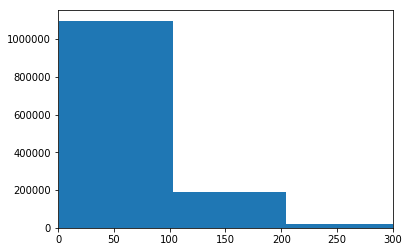

In [7]:
plt.hist(train_count)
plt.xlim(0,300)
plt.show()

In [8]:
#Distribution of words for test 
test_count=[]
for i in test['question_text'] :
    cnt=len(i)
    test_count.append(cnt)

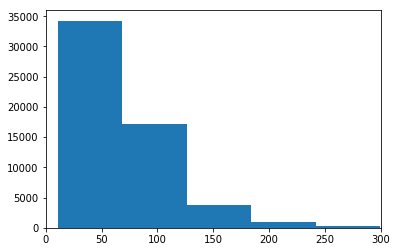

In [9]:
plt.hist(test_count)
plt.xlim(0,300)
plt.show()

### Sentiment Analysis

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(score)))
    return score

In [ ]:
a=sentiment_analyzer_scores("Has the United States become the largest dictatorship in the world?")

In [ ]:
a

In [ ]:
neg=[]
neu=[]
pos=[]
comp=[]
for i in train['question_text'] :
    sent=sentiment_analyzer_scores(i)
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])
    comp.append(sent['compound'])

In [ ]:
train['Negative Sentiment']= neg
train['Positive Sentiment']= pos
train['Neutral Sentiment']= neu
train['Compound Sentiment']= comp

In [ ]:
neg=np.reshape(neg,(-1,1))
pos=np.reshape(pos,(-1,1))
neu=np.reshape(neu,(-1,1))
comp=np.reshape(comp,(-1,1))

In [ ]:
train.head()

In [71]:
#Tokenizing the text
max_features = 50000
tokenizer = Tokenizer(lower = True, filters='', num_words=max_features)
full_text = list(train['question_text'].values) + list(test['question_text'].values)
tokenizer.fit_on_texts(full_text)

In [72]:
#Tokenizing the documents---- convert to strings
train_tokenized = tokenizer.texts_to_sequences(train['question_text'].fillna('missing'))
test_tokenized = tokenizer.texts_to_sequences(test['question_text'].fillna('missing'))

In [73]:
#Padding the same
max_len = 70
X_train = pad_sequences(train_tokenized, maxlen = max_len,padding='pre')
X_test = pad_sequences(test_tokenized, maxlen = max_len,padding='pre')

In [74]:
ohe = OneHotEncoder(sparse=False)
#y_ohe = ohe.fit_transform(train['target'].values.reshape(-1, 1))
y= keras.utils.to_categorical(train['target'])

In [75]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [76]:
#word_index is dictionary of the words and the sequence
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 462667 unique tokens.


In [58]:
folder_path= '/Users/s0c02nj/Downloads/glove.6B/glove.6B.300d.txt'
f=open(folder_path)
doc=f.readlines()
#****VIP
#**WORD TO VEC DICTIONARY
#Forming a dictionary-word2vec
word2vec={}
key=[]
#looping though the doc.in the doc the entire thing is saved and is separated by a space bar.
for line in doc:
    #parts contains every word separately for doc1
    parts=line.split(' ')
    #part[0] contains the word
    word=parts[0]
    key.append(word)
    #embed contains the vector
    embed=np.array(parts[1:],dtype='float32')
    #filling up the dictionary
    word2vec[word]=embed


In [78]:
#Embedding matrix creation
nb_words = min(max_features, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, 300))

for word, i in word_index.items():
    #print i
    if i >= nb_words:
        continue
    if word in word2vec:
        embedding_vector = word2vec[word]
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Null word embeddings: 1


keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform', 
                      embeddings_regularizer=None, activity_regularizer=None, 
                      embeddings_constraint=None, mask_zero=False, input_length=None)

input_length: Length of input sequences, when it is constant.

2D tensor with shape: (batch_size, sequence_length).


3D tensor with shape: (batch_size, sequence_length, output_dim).
embedding_matrix.shape

nb_wordsEMBEDDING_DIM

Embedding(vocabulary_size, 50, input_length=200, weights=[embedding_matrix], trainable=True)

shape: A shape tuple (integers), not including the batch size. For instance, shape=(32,) 
indicates that the expected input will be batches of 32-dimensional vectors.

keras.layers.Conv1D(filters, kernel_size, strides=1, padding='valid', 
                    data_format='channels_last', dilation_rate=1, 
                    activation=None)


##CNN 1D

In [37]:
def model_cnn_1D():
    
    inputs = Input(shape=(max_len,), dtype='int32')
    layer =  Embedding(max_features ,50,input_length=max_len,trainable=False,weights = [embedding_matrix])(inputs)
    
    #Convolution with Filter size 2
    x3 = Convolution1D(128, 2, activation='relu')(layer)
    x3 = MaxPooling1D(69)(x3)
    x3 = Flatten()(x3)
    
    
    #Convolution with Filter size 3
    x1 = Convolution1D(128, 3, activation='relu')(layer)
    x1 = MaxPooling1D(68)(x1)
    x1 = Flatten()(x1)
    
    #Convolution with Filter size 4
    x2 = Convolution1D(128, 4, activation='relu')(layer)
    x2 = MaxPooling1D(67)(x2)
    x2 = Flatten()(x2)
    
    #Concatenating
    merged = concatenate([x1,x2,x3],axis=1)
    
    #Dense Layer
    layer_dense = Dense(128, activation='relu')(merged)
    layer_dense = Dropout(0.2)(layer_dense)
    
    #Output Layer
    probabilities = Dense(2,activation='softmax')(layer_dense)

    model = Model(inputs=inputs,outputs=probabilities)
    return model

In [38]:
model= model_cnn_1D()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 70)           0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 70, 50)       2500000     input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 68, 128)      19328       embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 67, 128)      25728       embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_10 

In [39]:
model.compile(loss = "binary_crossentropy", optimizer = Adam(), metrics = ["accuracy"])

In [40]:
history = model.fit(X_train ,y, batch_size = 512, epochs = 2, validation_split=0.1, 
                        verbose = 1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/2
1175509/1175509 [==============================] - 444s 377us/step - loss: 0.1384 - acc: 0.9485 - val_loss: 0.1377 - val_acc: 0.9489
Epoch 2/2
1175509/1175509 [==============================] - 470s 399us/step - loss: 0.1246 - acc: 0.9526 - val_loss: 0.1258 - val_acc: 0.9521


In [ ]:
pred = model.predict(X_test, batch_size = 1024, verbose = 1)

In [ ]:
predictions = np.round(np.argmax(pred, axis=1)).astype(int)
sub['prediction'] = predictions
sub.to_csv("/Users/s0c02nj/Desktop/Data/submission.csv", index=False)

In [ ]:
# def model_attn_bilstm():
#     inputs = Input(shape=(max_len,))
#     layer =  Embedding(max_features ,50,input_length=max_len,trainable=False,weights = [embedding_matrix])(inputs)
#     layer =  Bidirectional(LSTM(64,return_sequences=True))(layer)
    
#     #Attention
#     activations_weights = Dense(1, activation='tanh')(layer)
#     activations_weights = Flatten()(activations_weights)
#     activations_weights = Activation('softmax')(activations_weights)
#     activations_weights = RepeatVector(128)(activations_weights)
#     activations_weights = Permute([2, 1])(activations_weights)
#     activations_weighted = multiply([layer, activations_weights])
#     sent_representation = Lambda(lambda x: K.sum(x, axis=-2))(activations_weighted)
    
#     #Defining inputs for sentiment scores
#     input_neg=Input(shape=(1,))
#     input_pos=Input(shape=(1,))
#     input_neu=Input(shape=(1,))
#     input_comp=Input(shape=(1,))
    
#     #Concatenating
#     layer_sentiment = concatenate([sent_representation,input_neg,input_pos,input_neu,input_comp],axis=1)
    
#     #Dense Layer
#     layer_sentiment= Dense(20, activation='tanh')(layer_sentiment)
    
#     #Output Layer
#     probabilities = Dense(2,activation='softmax')(layer_sentiment)

#     model = Model(inputs=[inputs,input_neg,input_pos,input_neu,input_comp],outputs=probabilities)
#     return model

In [94]:
def model_lstm_atten():
    inp = Input(shape=(max_len,))
    x = Embedding(max_features, 300, weights=[embedding_matrix], trainable=False)(inp)
    #x = SpatialDropout1D(0.1)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    y = Bidirectional(LSTM(128, return_sequences=True))(x)

    #atten_1 = Attention(maxlen)(x) # skip connect
    #atten_2 = Attention(maxlen)(y)
    avg_pool = GlobalAveragePooling1D()(y)
    max_pool = GlobalMaxPooling1D()(y)

    #conc = concatenate([atten_1, atten_2, avg_pool, max_pool])
    #conc = Dense(64, activation="elu", kernel_initializer="he_normal")(conc)
    #conc = Dropout(0.1)(conc)

    #conc = Dense(32, activation="elu", kernel_initializer="he_normal")(conc)
    #conc = Dropout(0.1)(conc)

    #outp = Dense(1, activation="sigmoid")(conc)

    model = Model(inputs=inp, outputs=max_pool)
    #model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

    return model

In [95]:
model=model_lstm_atten()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 70)                0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 70, 300)           15000000  
_________________________________________________________________
bidirectional_8 (Bidirection (None, 70, 256)           439296    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 70, 256)           394240    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
Total params: 15,833,536
Trainable params: 833,536
Non-trainable params: 15,000,000
_________________________________________________________________


In [5]:
def model():
   seq_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
   embedded_sequences = embedding_layer(seq_input)
   x = Conv1D(256, 2, activation='relu')(embedded_sequences)
   x = AveragePooling1D(2)(x)
   x = Conv1D(256, 2, activation='relu')(x)
   x = AveragePooling1D(2)(x)
   x = Conv1D(256, 2, activation='relu')(x)
   x = AveragePooling1D(2)(x)
   x = Flatten()(x)
   x = Dense(256, activation='relu')(x)
   pred = Dense(NUM_CLASSES, activation='softmax')(x)


   model = Model(seq_input, preds)